# Linear regression model  is used for prediction of numerical values .
# This is a supervised model of machine learning.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
url='https://raw.githubusercontent.com/baren-kumar/ML-/refs/heads/main/data-fuel-consumption-2.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

OLS methods= Ordinary least Square Methods: We will use this methods, and will get some results. By observing this terms results we will get valuable information.
R Square, Adjusted R Square, Probe(F-statistics), P>/T/

In [10]:
statMDL=smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG', data= df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:34:49   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# #Results Explain,
#R square= 0.89, the regression line has touched 89% of feature variables. That means it has explain 89% to the target variables.
# Adjusted R Squire= If input variables are added, then the R-square value will increase.But, increase the value will not always be good. when we will observe the r square value has increased after adding the feature values, but if the adjusted R square value does not increase, but decrease. Even if Adjusted r square value is lower than R square value. Then we will take decision adding feature value does not increase  the performence of the model.
# Probe(F-Statistic): if the value of prob-F statistic is more than 0.05, then the model is not good for regression analysis. The value always should be less than 0.05.
# P/t/ Value: Which feature variable contain the co-efficient value more than 0.05. These types of variable does not hold importance of the model performence. We can neglect this model.
FUELCONSUMPTION_CITY      
FUELCONSUMPTION_HWY      
FUELCONSUMPTION_COMB  
We drop this three form the analysis
# df model: How many feature variables has used/ or number of independent variables . In model has = 6
# Dep.Variables:

In [ ]:
# We will now find out Y= dependent variabl(Target) by using  X= Independent variables.


In [11]:
x=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']]
y=df['CO2EMISSIONS']

In [ ]:
# We will keep 25% of data for test, and rest of 75% data will use for train the model.

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=5)
linreg=LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [14]:
prediction=linreg.predict(x_test)

# How the model has given error free results. Now we will check this accuracy results.

In [18]:
print("Coefficient:", linreg.coef_)
print("Intercept:", linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("R2 score:", r2_score(y_test, prediction))
accuracy=linreg.score(x,y)
print('Accuracy:',accuracy*100, '%')

Coefficient: [11.11172826  6.34337788 -4.73059216]
Intercept: 307.1168046918609
MAE: 14.528021284008478
MSE: 487.3839241006477
RMSE: 22.0767734078295
R2 score: 0.8853480655959554
Accuracy: 88.3777879131166 %


# Interpretation the results:
# We have seen the model accuracy prediction is 88.37%. Even here we have got some intercept values.

In [ ]:
# Now we will observe the test and trainee set accuracy of the model

In [20]:
print('Train set accuracy:',r2_score(y_train, linreg.predict(x_train)))
print('Test set accuracy:',r2_score(y_test, prediction))

Train set accuracy: 0.8827636444239391
Test set accuracy: 0.8853480655959554


In [ ]:
# Now we will draw regression plot from the test prediction  data

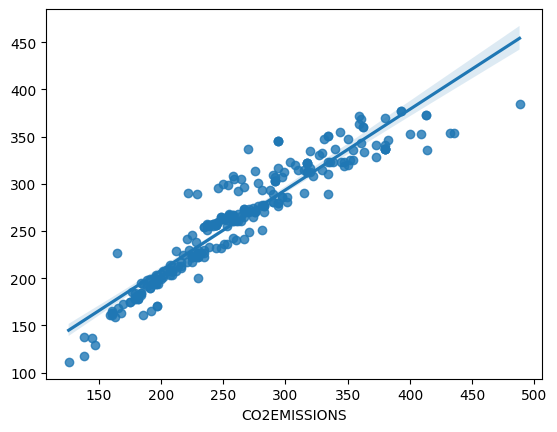

In [21]:
sns.regplot(x=y_test, y=prediction)
plt.show()

In [ ]:
# Now we will draw a visualize prediction and original values plot.

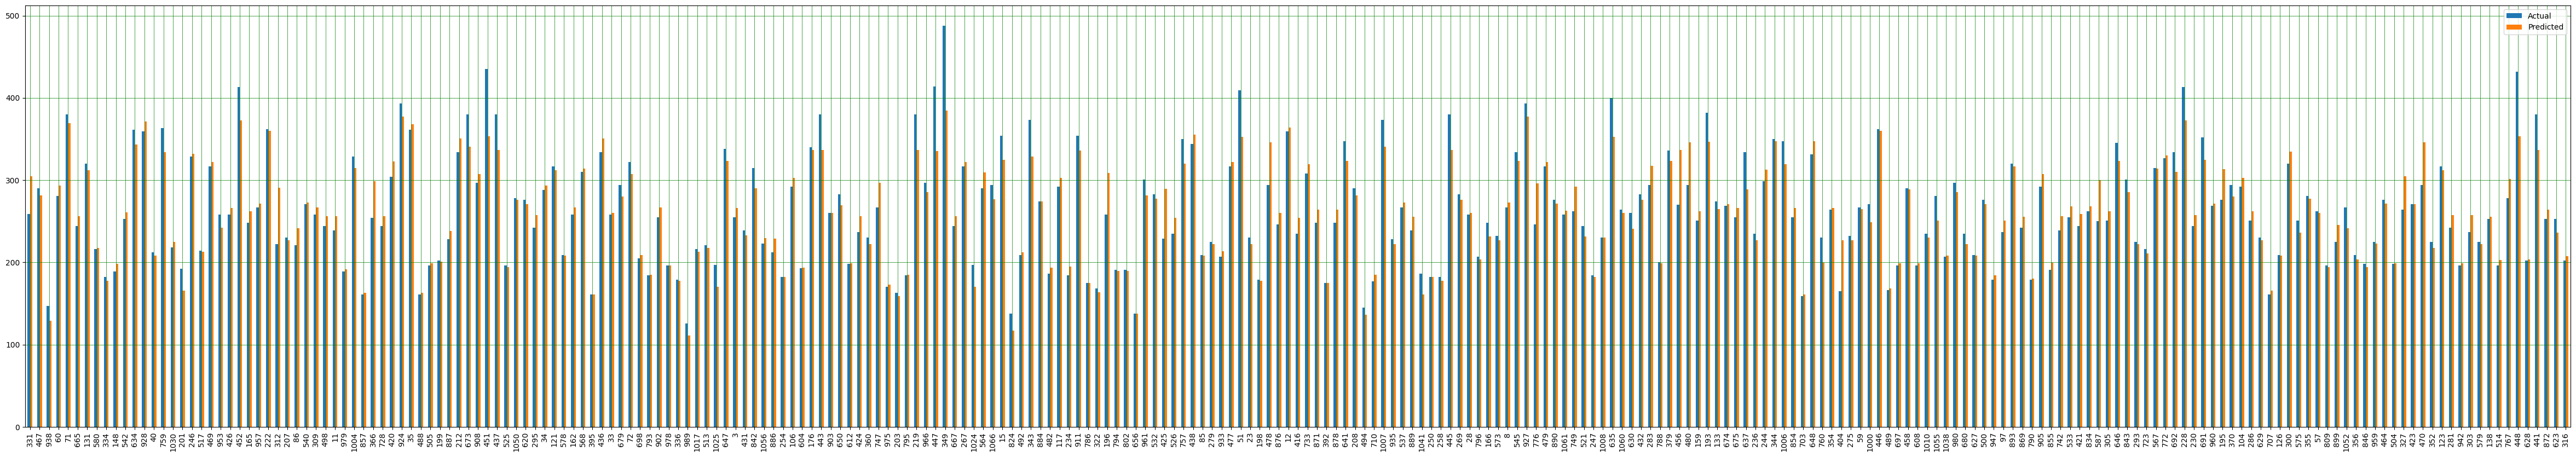

In [40]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# New observations ,
ENGINESIZE=4
CYLINDERS=4
FUELCONSUMPTION_COMB_MPG=6,
CO2EMISSIONS=??

In [32]:
new_observation= [[4,4,6]]
print (linreg.predict(new_observation))

[348.55367627]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Result: Our model has predicted the co2 emision will be 348.55 unit